In [2]:
from pymodulon.core import *
from pymodulon.plotting import *
from pymodulon.enrichment import *
from pymodulon.compare import *
from pymodulon.io import *
from pymodulon.util import explained_variance

import os
from os import path

from Bio.KEGG import REST
import tqdm.notebook as tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_venn import *
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D

# Import Data

In [3]:
ica_data = load_json_model('../data/processed_data/abaum_ica_data.json')

In [4]:
ica_data.imodulon_table

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,explained variance,n_genes,Function,Category,Evidence,Name
Fur-1,Fur,1.501639e-20,7.508194e-20,0.365854,0.348837,0.357143,15.0,43.0,41.0,1.0,0.007520,41,Iron homeostasis,Inorganic ions,Fisher's exact test,Fur-1
NDH-1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015195,9,NADPH dehyrogenase I operon,Energy metabolism,E.coli PRECISE2.0 iModulome comparison,NDH-1
BfmR-BfmS,BfmR-BfmS,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,6.0,6.0,6.0,1.0,0.002411,6,Two-component system regulating the pili chape...,Virulence,Fisher's exact test,BfmR-BfmS
PhoR-PhoB,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004925,20,Two-component system regulating inorganic phos...,Inorganic ions,E.coli PRECISE2.0 iModulome comparison,PhoR-PhoB
Fur-2,Fur,3.853864e-26,1.541546e-25,0.365385,0.441860,0.400000,19.0,43.0,52.0,1.0,0.020674,52,Iron homeostasis,Inorganic ions,"Fisher's exact test, E.coli PRECISE2.0 iModulo...",Fur-2
Pnt,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004305,3,Pnt operon encoding subunits of NADP transhydr...,Energy metabolism,Manual annotation,Pnt
GigA-GigB KO,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001633,2,Single gene iModulon capturing gigA and gigB k...,Genomic,Manual annotation,GigA-GigB KO
Cbl/GigC,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016704,27,Sulfur transport and cysteine metabolism,Inorganic ions,Manual annotation,Cbl/GigC
R7 mutant,AbaM,5.680000e-08,5.680000e-08,0.169492,0.142857,0.155039,10.0,70.0,59.0,1.0,0.011960,59,iModulon capturing the loss of the p1AB5075 pl...,Plasmid,Manual annotation,R7 mutant
ABUW_1645,ABUW_1645,2.987707e-16,0.000000e+00,0.583333,0.120690,0.200000,14.0,116.0,24.0,1.0,0.032379,24,Key regulator of the VIR-O/AV-T high frequency...,Virulence,Manual annotation,ABUW_1645


# Explained variance

In [4]:
rec_var = {}
for k in ica_data.imodulon_names:
    rec_var[k] = explained_variance(ica_data,imodulons=[k])
df_rec_var = pd.Series(rec_var)

Total explained variance:

In [5]:
explained_variance(ica_data)

0.5660840633039756

In [6]:
df = df_rec_var.sort_values(ascending=False)

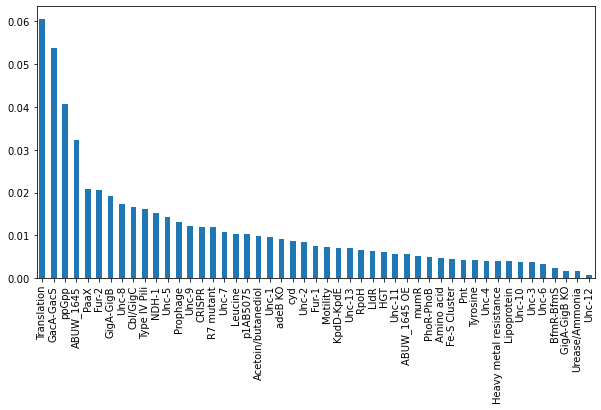

In [10]:
df.plot.bar(figsize=[10,5])
#plt.savefig('../figures/Figure5_ExplainedVar.svg')

# Cluster map analysis of iModulon Activities

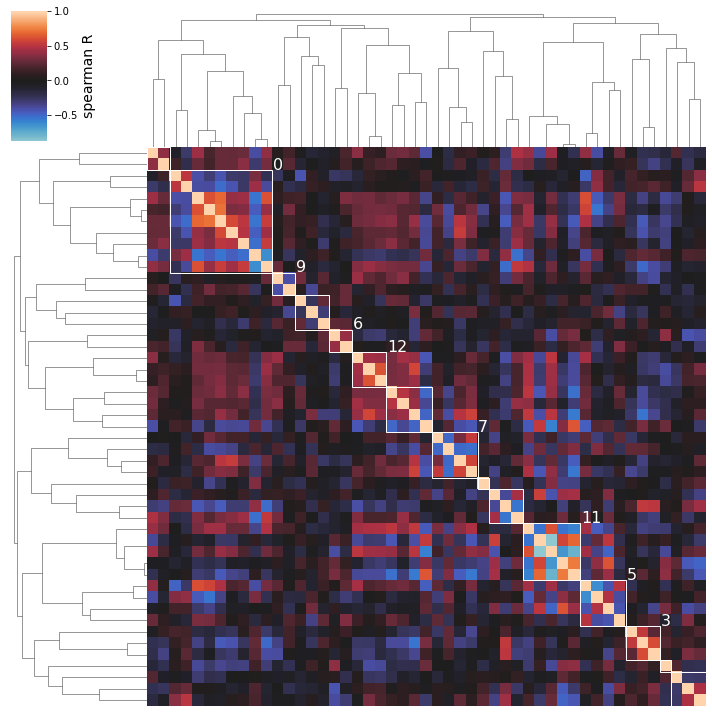

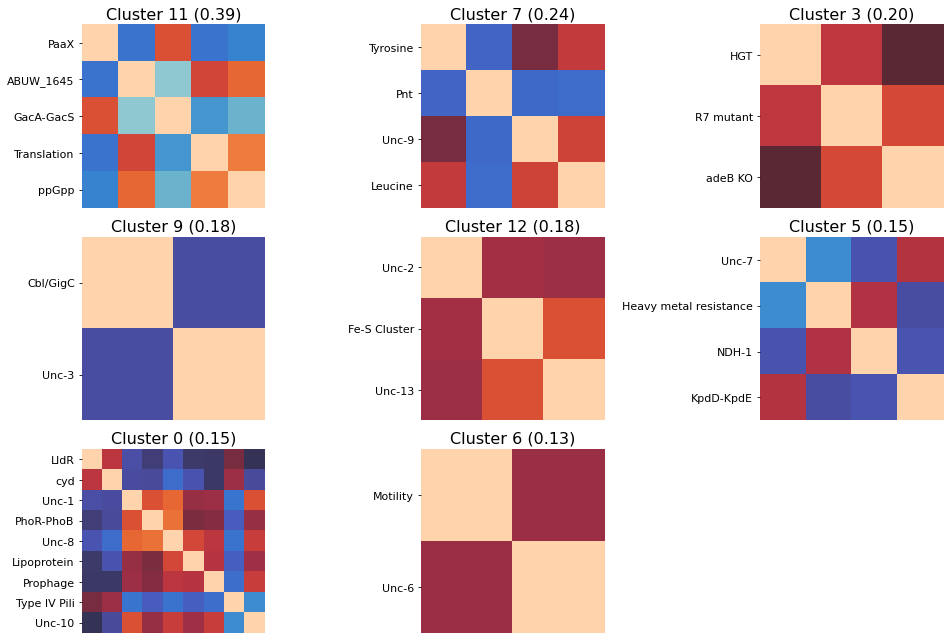

In [21]:
cluster_activities(ica_data, show_best_clusters=True, show_clustermap=True, correlation_method='spearman')
#plt.savefig("../figures/Figure5_ActivityClusterMap.svg",transparent=True)

Cluster 11 = Fear vs. Greed cluster - illustrated later in azithromycin treatment.

# Confirm Cluster 11 correlation

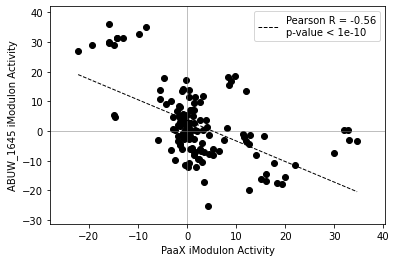

In [44]:
compare_activities(ica_data, 'PaaX', 'ABUW_1645', colors='black')
#plt.savefig("../figures/Figure5_Activity01.svg",transparent=True)

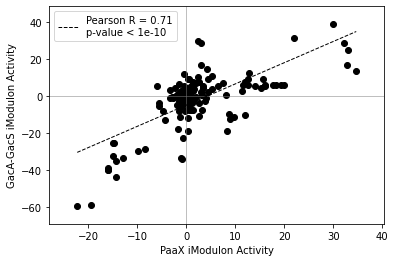

In [45]:
compare_activities(ica_data, 'PaaX', 'GacA-GacS', colors='black')
#plt.savefig("../figures/Figure5_Activity02.svg",transparent=True)

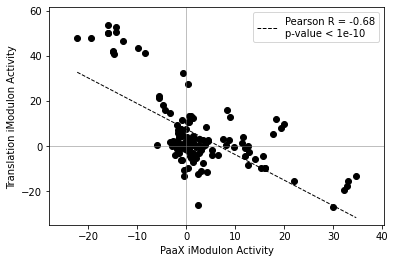

In [46]:
compare_activities(ica_data, 'PaaX', 'Translation', colors='black')
#plt.savefig("../figures/Figure5_Activity03.svg",transparent=True)

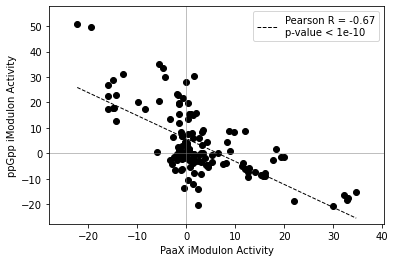

In [47]:
compare_activities(ica_data, 'PaaX', 'ppGpp', colors='black')
#plt.savefig("../figures/Figure5_Activity04.svg",transparent=True)

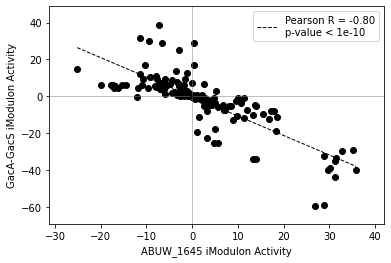

In [48]:
compare_activities(ica_data, 'ABUW_1645', 'GacA-GacS', colors='black')
#plt.savefig("../figures/Figure5_Activity05.svg",transparent=True)

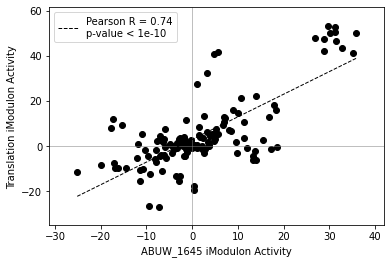

In [50]:
compare_activities(ica_data, 'ABUW_1645', 'Translation', colors='black')
#plt.savefig("../figures/Figure5_Activity06.svg",transparent=True)

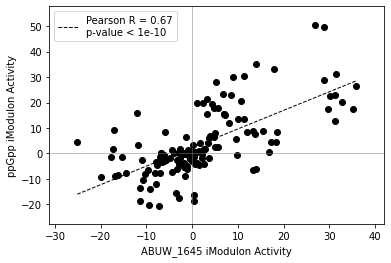

In [51]:
compare_activities(ica_data, 'ABUW_1645', 'ppGpp', colors='black')
#plt.savefig("../figures/Figure5_Activity07.svg",transparent=True)

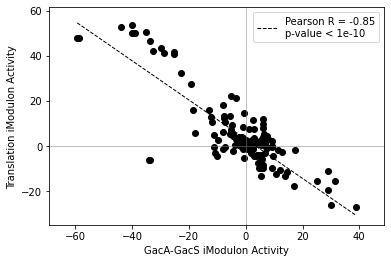

In [52]:
compare_activities(ica_data, 'GacA-GacS', 'Translation', colors='black')
#plt.savefig("../figures/Figure5_Activity08.svg",transparent=True)

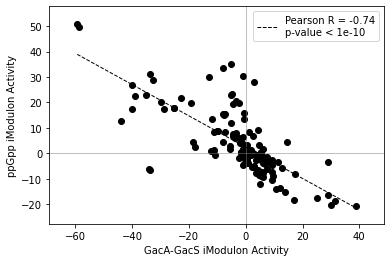

In [53]:
compare_activities(ica_data, 'GacA-GacS', 'ppGpp', colors='black')
#plt.savefig("../figures/Figure5_Activity09.svg",transparent=True)

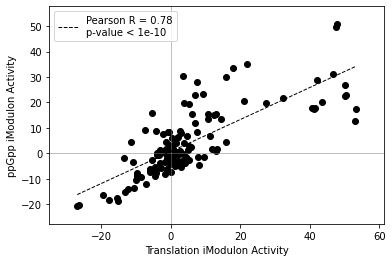

In [54]:
compare_activities(ica_data, 'Translation', 'ppGpp', colors='black')
#plt.savefig("../figures/Figure5_Activity10.svg",transparent=True)

# Cluster 11 Activity analysis

## Azithromycin 

In [108]:
azm_groups = ica_data.sample_table.groupby(["project","condition"])
azm_projects = {}
for i, j in azm_groups:
    if 'AB5075_AZI' in i[0]:
        azm_projects.update({i:list(j.index)})
        
azm_conc = [0,0.3,28,40]
azm_A = pd.DataFrame(index=ica_data.A.index)

for i,j in azm_projects.items():
    azm_A[i[0]+":"+i[1]] = ica_data.A[j].mean(axis=1)
    
azm_A["mean"] =  abs(azm_A.mean(axis=1))
azm_A = azm_A.sort_values("mean",ascending=False)
azm_A.drop(columns="mean",inplace=True)
azm_A.drop(columns="AB5075_AZI:preculture",inplace=True)

azm_A

,AB5075_AZI:AZI_000,AB5075_AZI:AZI_003,AB5075_AZI:AZI_028,AB5075_AZI:AZI_040
Translation,0.0,3.346631,29.780287,47.797742
GacA-GacS,0.0,-0.601067,-20.850417,-58.973313
ppGpp,0.0,2.582817,20.731444,50.117530
Acetoin/butanediol,0.0,0.678295,-14.667705,-29.950871
p1AB5075,0.0,1.144156,9.978380,23.325718
LldR,0.0,1.082693,11.131500,9.261889
ABUW_1645,0.0,0.764772,2.133450,27.946914
PaaX,0.0,0.289854,-0.086629,-20.759923
Leucine,0.0,-1.325997,-0.766456,-18.852644
NDH-1,0.0,1.032938,5.574505,12.588365


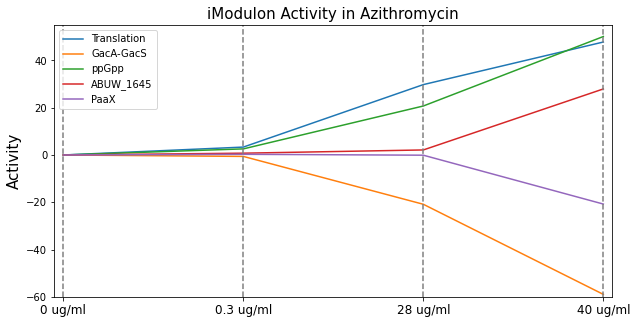

In [115]:
fig,ax = plt.subplots(figsize=[10,5])
#Plot all imods
#imod = ica_data.A.index

#Choosing imods in the cluster
imod = ['PaaX', 'ABUW_1645', 'GacA-GacS', 'Translation', 'ppGpp'] 

#Choosing imods > +/-20
#imod = ['Acetoin/butanediol', 'Paa', 'ABUW_1645', 'Unc-2', 'Translation-1', 'Translation-2', 'p1AB5075', ] 
legend = []

for i in azm_A.index:
    if i in imod:
        ax.plot(azm_A.loc[i])
        legend.append(i)
        
ax.plot([0,0],[-60,55],linestyle="--", color = "tab:grey")
ax.plot([1,1],[-60,55],linestyle="--", color = "tab:grey")
ax.plot([2,2],[-60,55],linestyle="--", color = "tab:grey")
ax.plot([3,3],[-60,55],linestyle="--", color = "tab:grey")

ax.set_ylim([-60,55])
ax.set_xlim([-0.05,3.05])
ax.set_title("iModulon Activity in Azithromycin",fontsize = 15)
ax.set_ylabel("Activity",fontsize = 15)
#set_solid_capstyle('round')
labels=["0 ug/ml", "0.3 ug/ml", "28 ug/ml","40 ug/ml"]
plt.xticks(ticks=[0,1,2,3],labels=labels,fontsize=12)

#ax.legend(legend)
#ax.legend(legend, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(legend, loc='upper left')

#plt.savefig("../figures/Figure5_AZMActivity.svg",transparent=True)

## Growth

In [18]:
time_groups = ica_data.sample_table.groupby(["project","condition"])
time_projects = {}
for i, j in time_groups:
    if 'growth' in i[0]:
        time_projects.update({i:list(j.index)})
        
time_points = [10,2,4,6,8]
growth_A = pd.DataFrame(index=ica_data.A.index)

for i,j in time_projects.items():
    growth_A[i[0]+":"+i[1]] = ica_data.A[j].mean(axis=1)
    
growth_A["mean"] =  abs(growth_A.mean(axis=1))
growth_A = growth_A.sort_values("mean",ascending=False)
growth_A.drop(columns="mean",inplace=True)

growth_A.head()

,growth:10h,growth:2h,growth:4h,growth:6h,growth:8h
GacA-GacS,15.349118,0.0,20.361357,35.122583,27.037225
PaaX,33.757453,0.0,2.324274,25.943240,32.507823
Fur-2,34.769887,0.0,0.822570,17.826016,30.861974
Translation,-15.400665,0.0,-19.294039,-21.125272,-17.449128
ppGpp,-16.944466,0.0,-17.161539,-19.601660,-16.945756


In [13]:
cols_A = list(growth_A.columns.values)
cols_A

['growth:10h', 'growth:2h', 'growth:4h', 'growth:6h', 'growth:8h']

In [14]:
growth_B = growth_A[['growth:2h', 'growth:4h', 'growth:6h', 'growth:8h', 'growth:10h']]
cols_B = list(growth_B.columns.values)
cols_B

['growth:2h', 'growth:4h', 'growth:6h', 'growth:8h', 'growth:10h']

In [15]:
growth_B.head()

,growth:2h,growth:4h,growth:6h,growth:8h,growth:10h
GacA-GacS,0.0,20.361357,35.122583,27.037225,15.349118
PaaX,0.0,2.324274,25.943240,32.507823,33.757453
Fur-2,0.0,0.822570,17.826016,30.861974,34.769887
Translation,0.0,-19.294039,-21.125272,-17.449128,-15.400665
ppGpp,0.0,-17.161539,-19.601660,-16.945756,-16.944466


In [64]:
time_projects

{('growth', '10h'): ['ABNM009', 'ABNM010'],
 ('growth', '2h'): ['ABNM001', 'ABNM002'],
 ('growth', '4h'): ['ABNM003', 'ABNM004'],
 ('growth', '6h'): ['ABNM005', 'ABNM006'],
 ('growth', '8h'): ['ABNM007', 'ABNM008']}

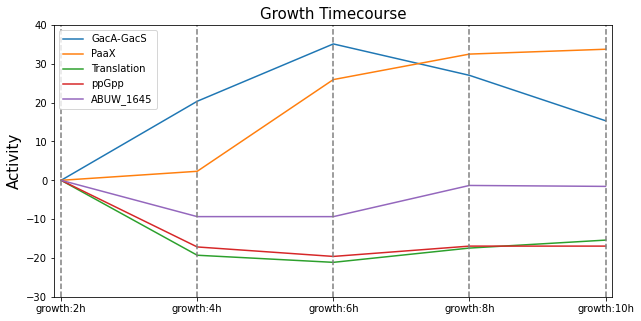

In [111]:
fig,ax = plt.subplots(figsize=[10,5])

#For plotting imods in cluster 11 
imod = ['PaaX', 'ABUW_1645', 'GacA-GacS', 'Translation', 'ppGpp'] 
legend = []

for i in growth_B.index:
    if i in imod:
        ax.plot(growth_B.loc[i])
        legend.append(i)
        
ax.plot([0,0],[-30,40],linestyle="--", color = "tab:grey")
ax.plot([1,1],[-30,40],linestyle="--", color = "tab:grey")
ax.plot([2,2],[-30,40],linestyle="--", color = "tab:grey")
ax.plot([3,3],[-30,40],linestyle="--", color = "tab:grey")
ax.plot([4,4],[-30,40],linestyle="--", color = "tab:grey")   

ax.set_ylim([-30,40])
ax.set_xlim([-0.05,4.05])

ax.set_title("Growth Timecourse",fontsize = 15)
ax.set_ylabel("Activity",fontsize = 15)

#ax2 = ax.twinx() # to put in OD600 values
#ax2.plot()

ax.legend(legend)

#plt.savefig("../figures/Figure5_Timecourse.svg",transparent=True)